In [1]:
import os
import sys
import pandas as pd
import numpy as np 
# 获取当前工作目录
current_dir = os.getcwd()
# 将项目根目录添加到 Python 路径
project_root = os.path.abspath(os.path.join(current_dir, ".."))  # 如果需要上一级目录

sys.path.insert(0, project_root)

# 导入模块
from self_package import get_stock
from self_package import tech_index as ti

In [2]:
# 使用函数
df_ts = get_stock.get_stock_data("601111", "daily", "20000101", "20250407")
df_ts = get_stock.standardize_stock_data(df_ts)


In [74]:
MA_5 = ti.MA(df_ts,'Open', 5)
MA_10 = ti.MA(df_ts,'Open', 10)
MA_20 = ti.MA(df_ts,'Open', 20)

nature_log_5_10 = ti.nature_log(MA_5, MA_10)
nature_log_5_20 = ti.nature_log(MA_5, MA_20)
nature_log_10_20 = ti.nature_log(MA_10, MA_20)

w = 0.01

pairs = [
    (nature_log_5_10, "5_10"),
    (nature_log_5_20, "5_20"),
    (nature_log_10_20, "10_20")
]

result = {}
for nature_log, name in pairs:
    result[name] = {}
    for idx in nature_log.index:
        x_input = nature_log[idx]
        fuzzified = ti.Fuzzification(x_input, w)
        ed1_output = ti.calculate_ed1(fuzzified)
        result[name][idx] = {
            "Fuzzified Input": fuzzified,
            "Calculated ed1": ed1_output
        }

# 打印结果
for name, data in result.items():
    print(f"Results for {name}:")
    for idx, values in data.items():
        print(f"Index: {idx}, Fuzzified Input: {values['Fuzzified Input']}, Calculated ed1: {values['Calculated ed1']}")
    print("\n")


result_df = pd.DataFrame.from_dict(result, orient='index')

ed_5_10 = result_df.loc['5_10']
ed_5_20 = result_df.loc['5_20']
ed_10_20 = result_df.loc['10_20']

import pandas as pd

# 创建两个空的DataFrame
def get_value(ed_file):
    """
    从包含嵌套字典的Series中提取'Calculated ed1'和'Fuzzified Input'数据
    
    参数:
    ed_file (pandas.Series): 包含嵌套字典的Series，索引为日期
    
    返回:
    tuple: (score_df, fuzzified_input_df) - 两个DataFrame，分别包含分数和模糊输入值
    """
    # 预先创建空字典来收集数据，避免频繁的DataFrame操作
    scores = {}
    fuzzified_inputs = {}
    
    # 一次性遍历Series
    for date, value in ed_file.items():
        # 提取'Calculated ed1'分数
        scores[date] = value.get('Calculated ed1')
        
        # 提取'Fuzzified Input'字典
        fuzzified_input = value.get('Fuzzified Input', {})
        if date not in fuzzified_inputs:
            fuzzified_inputs[date] = {}
        
        # 将模糊输入值添加到对应日期的字典中
        fuzzified_inputs[date].update(fuzzified_input)
    
    # 一次性创建DataFrame，而不是逐行添加
    score_df = pd.DataFrame.from_dict(scores, orient='index', columns=['value'])
    fuzzified_input_df = pd.DataFrame.from_dict(fuzzified_inputs, orient='index')
    
    # 转换索引为datetime类型并排序
    score_df.index = pd.to_datetime(score_df.index)
    fuzzified_input_df.index = pd.to_datetime(fuzzified_input_df.index)
    
    return score_df.sort_index(), fuzzified_input_df.sort_index()


score_df_5_10, fuzzified_input_df_5_10 = get_value(ed_5_10)


Results for 5_10:
Index: 2006-08-18 00:00:00, Fuzzified Input: {'AZ': 0.0, 'PS': 0.0, 'PM': 0.0, 'PL': 1.0, 'NS': 0.0, 'NM': 0.0, 'NL': 1.0}, Calculated ed1: 0.0
Index: 2006-08-21 00:00:00, Fuzzified Input: {'AZ': 0.0, 'PS': 0.0, 'PM': 0.0, 'PL': 1.0, 'NS': 0.0, 'NM': 0.0, 'NL': 1.0}, Calculated ed1: 0.0
Index: 2006-08-23 00:00:00, Fuzzified Input: {'AZ': 0.0, 'PS': 0.0, 'PM': 0.0, 'PL': 1.0, 'NS': 0.0, 'NM': 0.0, 'NL': 1.0}, Calculated ed1: 0.0
Index: 2006-08-24 00:00:00, Fuzzified Input: {'AZ': 0.0, 'PS': 0.0, 'PM': 0.0, 'PL': 1.0, 'NS': 0.0, 'NM': 0.0, 'NL': 1.0}, Calculated ed1: 0.0
Index: 2006-08-25 00:00:00, Fuzzified Input: {'AZ': 0.0, 'PS': 0.0, 'PM': 0.0, 'PL': 1.0, 'NS': 0.0, 'NM': 0.0, 'NL': 1.0}, Calculated ed1: 0.0
Index: 2006-08-28 00:00:00, Fuzzified Input: {'AZ': 0.0, 'PS': 0.0, 'PM': 0.0, 'PL': 1.0, 'NS': 0.0, 'NM': 0.0, 'NL': 1.0}, Calculated ed1: 0.0
Index: 2006-08-29 00:00:00, Fuzzified Input: {'AZ': 0.0, 'PS': 0.0, 'PM': 0.0, 'PL': 1.0, 'NS': 0.0, 'NM': 0.0, 'NL': 

In [75]:
score_df_5_10, fuzzified_input_df_5_10 = get_value(ed_5_10)
score_df_5_20, fuzzified_input_df_5_20 = get_value(ed_5_20)
score_df_10_20, fuzzified_input_df_10_20 = get_value(ed_10_20)


In [82]:
score_df_5_10.dropna(inplace=True)
score_df_5_20.dropna(inplace=True)
score_df_10_20.dropna(inplace=True)

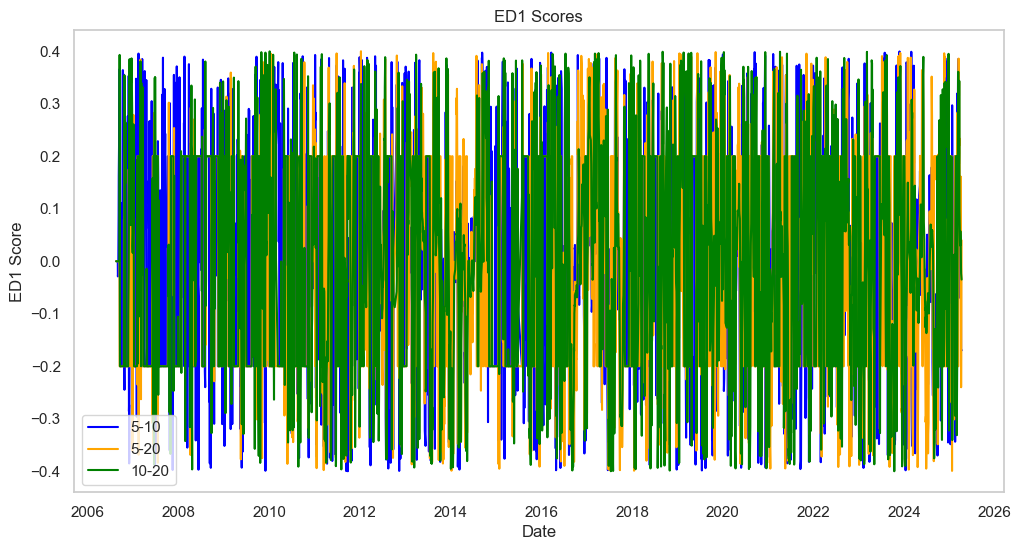

In [83]:
import matplotlib.pyplot as plt

# 绘制分数图
plt.figure(figsize=(12, 6))
plt.plot(score_df_5_10.index, score_df_5_10['value'], label='5-10', color='blue')
plt.plot(score_df_5_20.index, score_df_5_20['value'], label='5-20', color='orange')
plt.plot(score_df_10_20.index, score_df_10_20['value'], label='10-20', color='green')
plt.title('ED1 Scores')
plt.xlabel('Date')
plt.ylabel('ED1 Score')
plt.legend()
plt.grid()

plt.show()

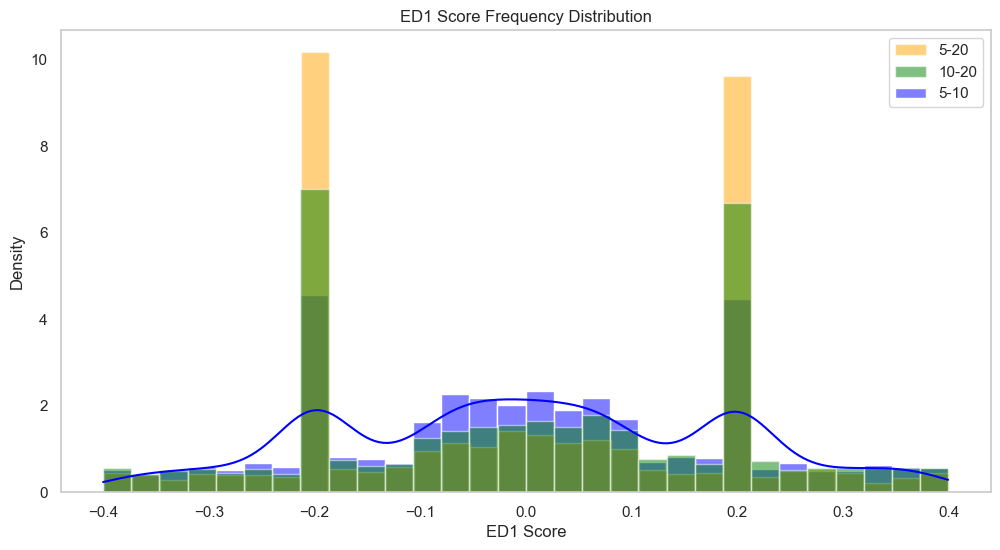

In [84]:
# 画出频率图 计算每个ed1值的频率
import seaborn as sns
import matplotlib.pyplot as plt

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个新的图形
plt.figure(figsize=(12, 6))

# 绘制频率图
sns.histplot(score_df_5_10['value'], bins=30, kde=True, color='blue', label='5-10', stat='density')
plt.hist(score_df_5_20['value'], bins=30, density=True, alpha=0.5, color='orange', label='5-20')
plt.hist(score_df_10_20['value'], bins=30, density=True, alpha=0.5, color='green', label='10-20')

plt.title('ED1 Score Frequency Distribution')
plt.xlabel('ED1 Score')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()
